In [103]:
#imports
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt


#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Calibration
from sklearn.calibration import calibration_curve
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV

#cross validation
#cross validation is deprecated and now is model_selection
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [104]:
rawData = pd.read_csv('datos.csv', header =1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [105]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [106]:
#Select the features
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head(2000)

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689
...,...,...,...,...,...,...,...,...,...,...,...
1995,8657,6847,18762,22928,3129,2398,6847,18762,22928,0,2398
1996,15050,16203,16891,15474,14612,16354,2000,1300,2000,1000,2000
1997,14769,15271,15383,14548,16274,15650,1573,1512,504,2770,613
1998,121374,125965,102527,103337,105942,101830,8200,3000,4000,4500,4000


In [107]:
#Select the Dependent Variable
#dependent variable
depVar = rawData['PAY_AMT6']
depVar.head(2000)

0           0
1        2000
2        5000
3        1000
4         679
        ...  
1995    23149
1996     1000
1997       14
1998     4200
1999        0
Name: PAY_AMT6, Length: 2000, dtype: int64

In [108]:
#Establish the training set for the X-variables or Feature space
#(first 1000 rows: only for this example you will still follow a 70/30 split for your final models)
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head(2000)
#X_train.count()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689
...,...,...,...,...,...,...,...,...,...,...,...
995,-200,-200,-200,0,60800,0,0,0,200,60800,0
996,39716,40799,41853,44452,45433,46383,1600,1600,3169,1700,1700
997,0,0,0,0,0,0,0,0,0,0,0
998,780,0,780,390,390,500,0,780,0,390,500


In [109]:
#Establish the training set for the Y-variable or dependent variable
#(the number of rows much match the X-training set)
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head(2000)

The number of observations in the Y training set are: 1000


0          0
1       2000
2       5000
3       1000
4        679
       ...  
995        0
996     1495
997        0
998    18300
999     2000
Name: PAY_AMT6, Length: 1000, dtype: int64

In [110]:
#Establish the testing set for the X-Variables or Feature space
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head(2000))

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   
...          ...        ...        ...        ...        ...        ...   
29995     188948     192815     208365      88004      31237      15980   
29996       1683       1828       3502       8979       5190          0   
29997       3565       3356       2758      20878      20582      19357   
29998      -1645      78379      76304      52774      11855      48944   
29999      47929      48905      49764      36535      32428      15313   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  

In [111]:
#Establish Ground truth 
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head(2000)

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
         ...  
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 100, dtype: int64

In [112]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
#X_train.shape, X_test.shape

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [114]:
model = LinearRegression(n_jobs=10)

#### Establish variables that you will use for defining each model. 
#### As you can see we've established three different models with the individual variable names; 
#### we'll refer to each when we build the model later.

In [115]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

#### While not mandatory, it is a good idea to establish a variable specifically for your features so you
#### will have full control over what is being used for training


In [116]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


#### Again while not mandatory, but it might be a good idea to validate that the correct column is
#### being used for the dependent variable


In [117]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


####  Use the model variables you established in step 2  pass the training data to them in the following format
#### (You used the train function from caret for this when you worked in R)

## Random Forest

In [118]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Support Vector Regression

In [119]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Linear Regression

In [120]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### 1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#### 2nd value: The time for fitting the estimator on the train set for each cv split.
#### 3rd Value:  The time for scoring the estimator on the test set for each cv split.

In [122]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.03026294  0.06758939 -0.60074335]


## 1. Random Forest Regression Model Fitting and Scoring

In [123]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.02601375  0.09474432 -0.31590374]


0.841643390863062

## 2.Support Vector Regression Model Fitting and Scoring

In [124]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.02047274 -0.03851301 -0.05391587]


-0.028031790451299443

## 3. Linear Regression Model Fitting and Scoring

In [125]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[ 0.23272611  0.36432189 -1.41214125]


0.577019925040551

# Making Predictions

####  Now you can use the sqrt function and the mean_squared_error function to compose your own function for calculating RMSE

In [128]:
rmse = sqrt(mean_squared_error(y_test, predictions))

####  Next, establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared as follows

In [129]:
predRsquared = r2_score(y_test,predictions)

#### Here is how it all looks together

In [202]:
#Make Predictions
predictions = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.047
RMSE: 7886.181


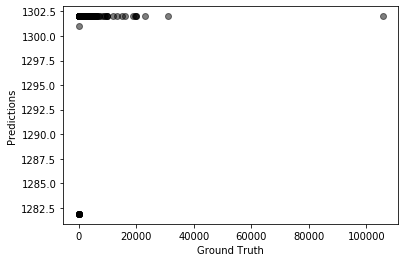

In [203]:
predictions = modelSVR.predict(X_test)
plt.scatter(y_test, predictions, color=['black'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [204]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -1.811
RMSE: 12920.347


predictions 250


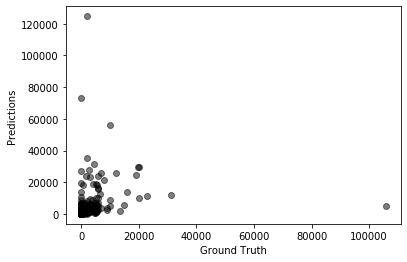

In [206]:
predictions = modelRF.predict(X_test)
print('predictions %s' %len(predictions))
colors = np.random.random(250)
plt.scatter(y_test, predictions, c=['black'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [207]:
#Make Predictions
predictions = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -3.376
RMSE: 16120.100


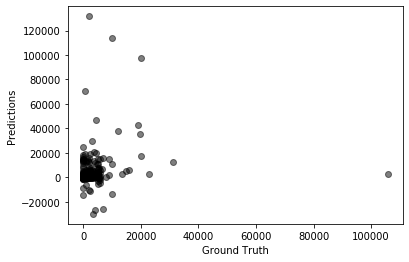

In [208]:
predictions = modelLR.predict(X_test)
plt.scatter(y_test, predictions, color=['black'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();